In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colorbar import make_axes
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

import os, glob

from libraries.read_lib import read_pgm

%load_ext autoreload
%matplotlib inline
%pylab inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [28]:
%autoreload 2

In [3]:
source = os.path.realpath('../data/samples/')
print(source)

/home/bec/stin/data/samples


In [4]:
filelist = glob.glob(source + '/test*.ppm')
filelist.sort()
headlist = []
imlist = []
for file in filelist[-4:]:
    print(file)
    h, im = read_pgm(file)
    headlist.append(h)
    imlist.append(im)

#for f in glob.glob(source+'test*'):
#    os.remove(f)

/home/bec/stin/data/samples/test-0000000004.ppm
/home/bec/stin/data/samples/test-0000000005.ppm
/home/bec/stin/data/samples/test-0000000006.ppm
/home/bec/stin/data/samples/test-0000000007.ppm


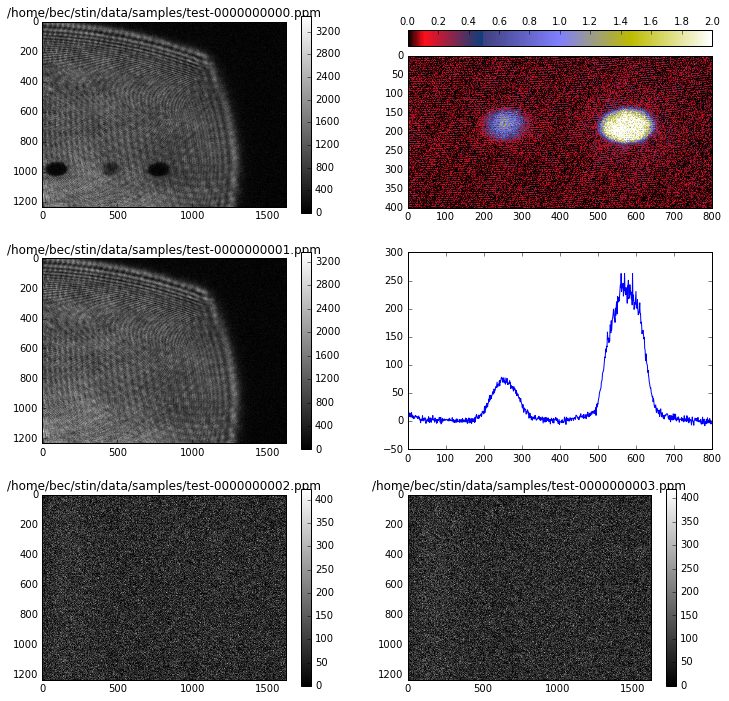

In [5]:
nrows, ncols = 3, 2
fig = plt.figure(figsize = (6*ncols,4*nrows))
gs = GridSpec(nrows, ncols, )
axes = [plt.subplot(gs[j,0]) for j in range(nrows)] + [plt.subplot(gs[-1,1])]

ax0 = plt.subplot(gs[0,1])
ax1 = plt.subplot(gs[1,1])

for j, (ax, im) in enumerate(zip(axes, imlist)):
    i = ax.imshow(im, cmap='gray',)
    cax, kw = make_axes(ax)
    ax.set_title(filelist[j])
    plt.colorbar(i, cax, **kw)
    
atoms, ref, b1, b2 = imlist
od_crop = (slice(800,1200), slice(200,1000))

#OD = -np.log((atoms[od_crop]-b1[od_crop])/(ref[od_crop]-b2[od_crop]+1))
OD = -np.log((atoms[od_crop]+1)/(ref[od_crop]+1))

i2 = ax0.imshow(OD, cmap='gist_stern', vmin=0, vmax=2)
cax, kw = make_axes(ax0, 'top')
plt.colorbar(i2, cax=cax, **kw)

ax1.plot(OD.sum(0))

In [6]:
OD

array([[ 0.01201216, -0.00405269, -0.24906724, ..., -0.09274483,
         0.2087398 , -0.01382909],
       [ 0.5128748 ,  0.20086895,  0.37151625, ...,  0.02476907,
         0.38038671,  0.06809437],
       [ 0.13642003, -0.10218545,  0.090346  , ...,  0.0354717 ,
        -0.28391777,  0.14230403],
       ..., 
       [-0.02686528,  0.14096793,  0.04874061, ..., -0.10144437,
        -0.12136086, -0.021229  ],
       [-0.31015493,  0.05798726, -0.21516832, ...,  0.01072396,
         0.01927771,  0.18271925],
       [-0.16774251, -0.01133157, -0.15539608, ..., -0.04664523,
         0.10120153, -0.04308869]])

In [9]:
OD.max()

7.4849302832896614

In [10]:
OD.min()

-0.99852883011112725

In [52]:
(OD + abs(OD.min()))

array([[ 1.01054099,  0.99447614,  0.74946159, ...,  0.905784  ,
         1.20726863,  0.98469974],
       [ 1.51140363,  1.19939778,  1.37004508, ...,  1.0232979 ,
         1.37891554,  1.0666232 ],
       [ 1.13494886,  0.89634338,  1.08887483, ...,  1.03400053,
         0.71461106,  1.14083286],
       ..., 
       [ 0.97166355,  1.13949676,  1.04726944, ...,  0.89708446,
         0.87716797,  0.97729983],
       [ 0.6883739 ,  1.05651609,  0.78336051, ...,  1.00925279,
         1.01780654,  1.18124808],
       [ 0.83078632,  0.98719726,  0.84313275, ...,  0.9518836 ,
         1.09973036,  0.95544014]])

In [76]:
#b = ((2**16/OD.max()) * (OD + abs(OD.min())) )
b = ((2**16/(OD.max()-OD.min())) * OD )

In [77]:
b

array([[   92.79571864,   -31.30764442, -1924.08193186, ...,
         -716.4677742 ,  1612.54637351,  -106.83178983],
       [ 3962.03515085,  1551.74291344,  2870.01904384, ...,
          191.34478355,  2938.54467447,   526.03925206],
       [ 1053.86528953,  -789.39801207,   697.93643276, ...,
          274.02422113, -2193.30756312,  1099.32008171],
       ..., 
       [ -207.53835629,  1088.99849048,   376.52856752, ...,
         -783.67307013,  -937.53090789,  -163.9972272 ],
       [-2395.99355754,   447.96030329, -1662.20770083, ...,
           82.84423294,   148.92317932,  1411.53374108],
       [-1295.83613128,   -87.53805495, -1200.45813805, ...,
         -360.34140687,   781.79704316,  -332.86659973]])

In [78]:
b.min()

-7713.7856781548007

In [79]:
b.max()

57822.214321845197

In [80]:
c = b.astype(np.uint16)

In [81]:
c

array([[   92, 65505, 63612, ..., 64820,  1612, 65430],
       [ 3962,  1551,  2870, ...,   191,  2938,   526],
       [ 1053, 64747,   697, ...,   274, 63343,  1099],
       ..., 
       [65329,  1088,   376, ..., 64753, 64599, 65373],
       [63141,   447, 63874, ...,    82,   148,  1411],
       [64241, 65449, 64336, ..., 65176,   781, 65204]], dtype=uint16)

In [82]:
c.min()

0

In [83]:
c.max()

65522

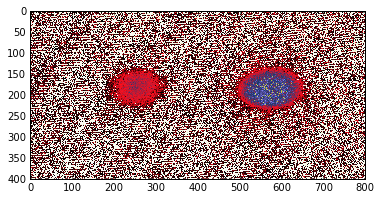

In [84]:
imshow(c[:,:],interpolation='none', cmap='gist_stern')
show()

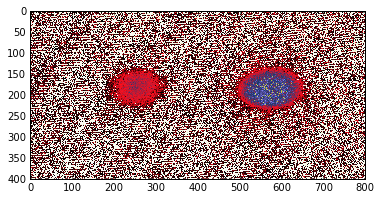

In [86]:
imshow(c[:,:]*(10/2**16),interpolation='none', cmap='gist_stern')
show()